# 1. 导入包

In [1]:
'''
Python 3.7.7
sklearn 0.23.1
使用轮廓系数评估超市客户分组效果
'''

# 导入包
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. 导入数据集

In [2]:
# 导入数据集
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

# 3. 使用K-Means算法得到不同K值对应的WCSS

## 3.1 生成WCSS

In [3]:
# 使用肘部法则选择最优的K值
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, max_iter=300, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

## 3.2. 画出 K值 vs WCSS 图

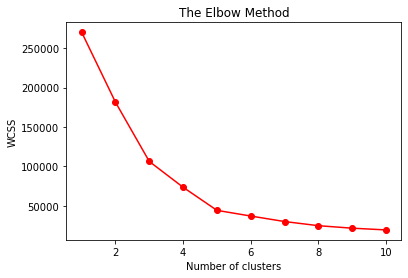

In [4]:
# 画出 聚类个数 vs WCSS 图
plt.figure()
plt.plot(range(1, 11), wcss, 'ro-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### 由上图可见，从K=5开始，WCSS下降不再明显

# 4. 使用K-Means算法得到不同K值对应的轮廓系数

In [5]:
# 聚类个数2-10时，对应的轮廓系数
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, max_iter=300, random_state = 0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    silhouette = silhouette_score(X, y_kmeans)
    print('当聚类个数是%d时，对应的轮廓系数是%.4f' %(i, silhouette))

当聚类个数是2时，对应的轮廓系数是0.2969
当聚类个数是3时，对应的轮廓系数是0.4676
当聚类个数是4时，对应的轮廓系数是0.4932
当聚类个数是5时，对应的轮廓系数是0.5539
当聚类个数是6时，对应的轮廓系数是0.5394
当聚类个数是7时，对应的轮廓系数是0.5270
当聚类个数是8时，对应的轮廓系数是0.4576
当聚类个数是9时，对应的轮廓系数是0.4565
当聚类个数是10时，对应的轮廓系数是0.4498


#### 由输出结果可见，聚类个数是5时，轮廓系数的值最高

#### 结论：肘部法则和轮廓系数都是确定K-Means模型中K值的方法